<a href="https://colab.research.google.com/github/Bortkivskiy/assignment-1-web-scraping-data-collection-visualization-Bortkivskiy/blob/main/tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт бібліотек

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

# Налаштування matplotlib для відображення графіків у Colab
%matplotlib inline


Витяг даних із веб-сторінки

In [2]:
def parse_web_page(url):
    """
    Fetch the content of the given web page.

    Args:
        url (str): The URL of the web page to fetch.

    Returns:
        str: The content of the page as a string without HTML tags.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup.get_text(separator=' ', strip=True)


Перевірка функції



In [3]:
print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])  # Перші 255 символів
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])


Головна - Факультет математики та інформатики Перейти до основного вмісту [email protected] 58012, Україна, м. Чернівці, вул. Університетська, 28 Новини Всі Загальні Оголошення Події Студенту Викладачу Вітання Діяльність Наукова Навчально-методична Міжнар
Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Search Searc


Отримання даних з API та збереження в JSON-файл

In [4]:
def parse_api(api_url):
    """
    Отримує дані з API і зберігає їх у файл result.json.

    Args:
        api_url (str): URL API.

    Returns:
        None.
    """
    response = requests.get(api_url)
    response.raise_for_status()
    data = response.json()
    with open('/content/result.json', 'w') as file:
        json.dump(data, file, indent=4)


Перевірка функції parse_api(api_url)

In [5]:
parse_api('https://api.github.com/')

# Вивід для перевірки створеного файлу
with open('/content/result.json', 'r') as file:
    print(file.read())


{
    "current_user_url": "https://api.github.com/user",
    "current_user_authorizations_html_url": "https://github.com/settings/connections/applications{/client_id}",
    "authorizations_url": "https://api.github.com/authorizations",
    "code_search_url": "https://api.github.com/search/code?q={query}{&page,per_page,sort,order}",
    "commit_search_url": "https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}",
    "emails_url": "https://api.github.com/user/emails",
    "emojis_url": "https://api.github.com/emojis",
    "events_url": "https://api.github.com/events",
    "feeds_url": "https://api.github.com/feeds",
    "followers_url": "https://api.github.com/user/followers",
    "following_url": "https://api.github.com/user/following{/target}",
    "gists_url": "https://api.github.com/gists{/gist_id}",
    "hub_url": "https://api.github.com/hub",
    "issue_search_url": "https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}",
    "issues_url": 

Парсинг JSON-файлу для отримання погоди на конкретну дату

In [6]:
def parse_json(date):
    """
    Парсить дані з файлу weather.json і повертає погоду для конкретної дати.

    Args:
        date (str): Дата для отримання даних погоди.

    Returns:
        list: Список записів погоди для вказаної дати.
    """
    with open('/content/weather.json', 'r') as file:
        data = json.load(file)

    weather_data = [entry for entry in data if entry['date'] == date]
    return weather_data


Створення тестового JSON-файлу weather.json

In [7]:
# Створюємо тестові дані
weather_data = [
    {"date": "2024-08-19", "temperature": 25, "humidity": 60},
    {"date": "2024-08-20", "temperature": 22, "humidity": 55},
    {"date": "2024-08-19", "temperature": 24, "humidity": 65}
]

with open('/content/weather.json', 'w') as file:
    json.dump(weather_data, file, indent=4)


Перевірка функції parse_json(date)

In [8]:
target_date = '2024-08-19'
print(parse_json(target_date))


[{'date': '2024-08-19', 'temperature': 25, 'humidity': 60}, {'date': '2024-08-19', 'temperature': 24, 'humidity': 65}]


Парсинг CSV-файлу для отримання погоди на конкретну дату

In [9]:
def parse_csv(date):
    """
    Парсить дані з файлу weather.csv і повертає погоду для конкретної дати.

    Args:
        date (str): Дата для отримання даних погоди.

    Returns:
        list: Список записів погоди для вказаної дати.
    """
    weather_data = []
    with open('/content/weather.csv', 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['date'] == date:
                weather_data.append(row)
    return weather_data


Створення тестового CSV-файлу weather.csv

In [10]:
# Створення тестових даних для weather.csv
csv_data = """date,temperature,humidity
2024-08-19,25,60
2024-08-20,22,55
2024-08-19,24,65
"""

with open('/content/weather.csv', 'w') as file:
    file.write(csv_data)


Перевірка функції parse_csv(date)

In [11]:
target_date = '2024-08-19'
print(parse_csv(target_date))


[{'date': '2024-08-19', 'temperature': '25', 'humidity': '60'}, {'date': '2024-08-19', 'temperature': '24', 'humidity': '65'}]


Візуалізація даних

In [12]:
def visualize_data():
    """
    Зчитує дані з weather.csv і створює графіки, що зберігаються у вигляді зображень.
    """
    data = pd.read_csv('/content/weather.csv')

    # Графік температури за датами
    plt.figure(figsize=(10, 5))
    plt.plot(data['date'], data['temperature'], marker='o', label='Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('/content/temperature_plot.png')
    plt.show()

    # Гістограма вологості
    plt.figure(figsize=(10, 5))
    plt.hist(data['humidity'], bins=10, color='skyblue')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Frequency')
    plt.title('Humidity Distribution')
    plt.savefig('/content/humidity_histogram.png')
    plt.show()


Перевірка функції visualize_data()

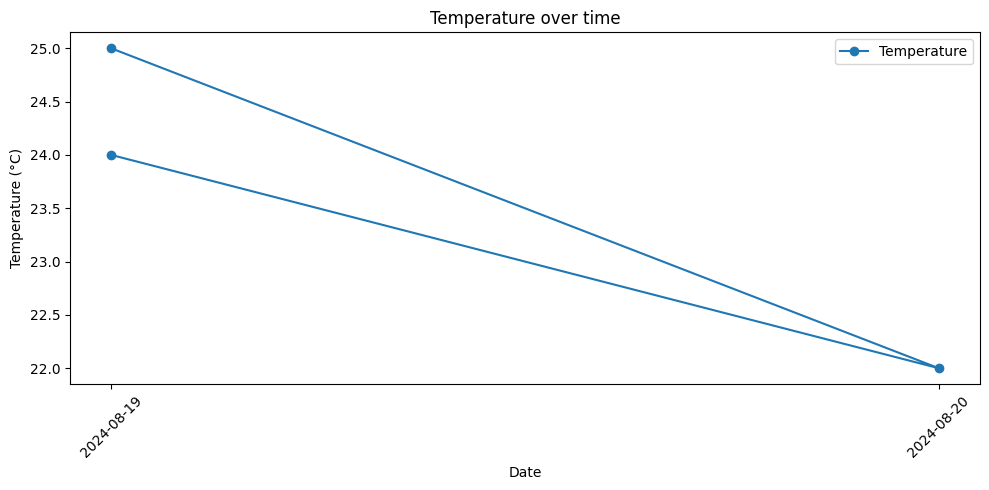

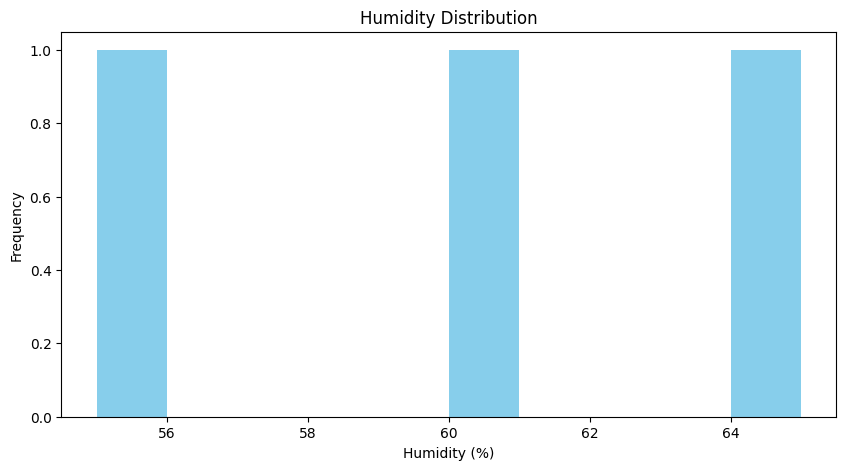

In [13]:
visualize_data()


Перевірка збережених зображень

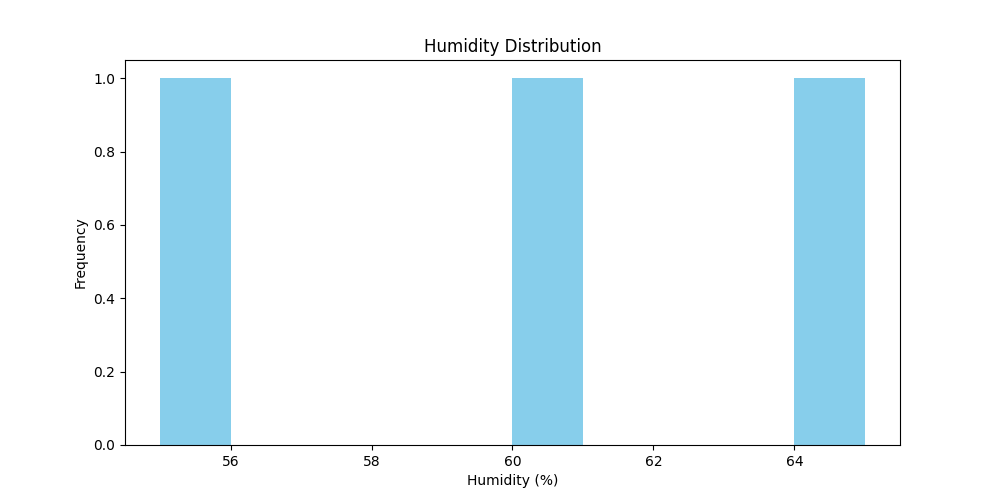

In [14]:
from IPython.display import Image

# Відображення графіку температури
Image('/content/temperature_plot.png')

# Відображення гістограми вологості
Image('/content/humidity_histogram.png')
